# Lab2: Date Preperation
In this lab, I am going to:
- encode all categorcal attributes as numerical
- treat/fill in missing values
- apply scaler where necessary
- treat outliers appropriately
- create at least one new feature from the existing ones.

And save the prepared Dataset as a csv
## A: Import Python Modules and Dataset

In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes


Checking missing values and seperating the original database with a copy

In [43]:
df_original = df
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

## B: Process and Encode the Categorical Features as Numerical

### Endoding Ordinal Category Attributes
marital: (categorical: 'divorced','married','single','unknown')

`marital encoded:`
- single = 1
- married = 2
- divorced = 3

education (categorical:'primary','secondary','tertiary','NaN','unknown')

`education encoded:`
- primary = 1
- secondary = 2
- tertiary = 3
- NaN = -1


In [44]:
# Create a mapper
scale_mapper_married = {
    "single": 0,
    "married": 1,
    "divorced": 2    
}
# Removing because it contains NaN 
#scale_mapper_education = {
#    "primary": 0,
  #  "secondary": 1,
   # "tertiary": 2    
#}

df['marital'] = df['marital'].replace(scale_mapper_married)
#df['education'] = df['education'].replace(scale_mapper_education)

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,0,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,2,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,1,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,1,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,1,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,student,0,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,0,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,1,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,1,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes


### One-Hot Encode All Other Categorical Attributes

In [45]:
# first one-hot encode the categorical columns with NaNs
df = pd.get_dummies(df, columns=['education', 'contact', 'poutcome', 'job'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

,age,marital,default,balance,housing,loan,day,month,duration,campaign,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan
1995,20.0,0,no,2785,no,no,16,sep,327,2,...,0,0,0,0,0,0,1,0,0,0
1996,28.0,0,no,127,no,no,16,sep,1334,2,...,0,0,0,0,0,0,0,0,0,0
1997,81.0,1,no,1154,no,no,17,sep,231,1,...,0,0,0,1,0,0,0,0,0,0
1998,46.0,1,no,4343,yes,no,20,sep,185,1,...,0,0,0,0,0,1,0,0,0,0
1999,40.0,1,no,6403,no,no,22,sep,208,2,...,1,0,0,0,0,0,0,0,0,0


In [46]:
# now one-hot encode all other categorical columns
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,marital,balance,day,duration,campaign,pdays,previous,education_secondary,education_tertiary,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,subscribed_yes
0,32.0,0,392,1,957,2,131,2,0,1,...,0,0,0,0,0,0,0,0,0,0
1,39.0,2,688,1,233,2,133,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,59.0,1,1035,1,126,2,239,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,47.0,1,398,1,274,1,238,2,1,0,...,0,0,0,0,0,0,0,0,0,0
4,54.0,1,1004,1,479,1,307,1,1,0,...,0,0,0,0,0,0,0,0,0,0


### C. Treatment of Missing Values in Numerical Columns
### Looking for missing values

In [47]:
# Find the number of nulls/NaNs in the dataset
df.isna().sum()

age                    12
marital                 0
balance                 0
day                     0
duration                0
campaign                0
pdays                   0
previous                0
education_secondary     0
education_tertiary      0
education_nan           0
contact_telephone       0
contact_nan             0
poutcome_other          0
poutcome_success        0
poutcome_nan            0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
job_nan                 0
default_yes             0
housing_yes             0
loan_yes                0
month_aug               0
month_dec               0
month_feb               0
month_jan               0
month_jul               0
month_jun               0
month_mar               0
month_may               0
month_nov   

I can see that there is 12 rows in `age` that have missing values.
There is no point in removing the column `age` since there isn't more than 25% of missing values in the attribute

### Impute Missing Values

To deal with missing values, I am going to build a ML Model(KNN) to predict the missing values on the basis of the other columns.

Since `age` is missing values I will try to predict the `age` by the `marital` and `education` values to give a good prediction of the `age`

I am going to see if the trend exists using boxplots

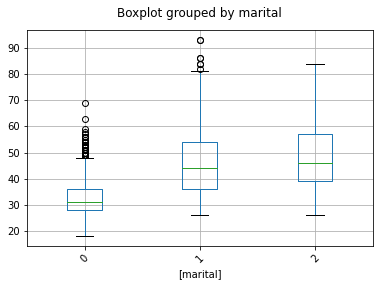

In [59]:
df.boxplot(column='age', by=['marital'], rot=45)
plt.title("")
plt.show()

Looking at the boxplot above I can examine the that;
- single [0] average about 31 years old
- married [1] average about 45 years old
- divorced [2] avarage about 47 years old

In [69]:
ptable = df.pivot_table(values='age', 
                        index='marital',
                        columns="job_student",
                        aggfunc=np.median)
ptable

job_student,0,1
marital,,
0,32.0,25.0
1,44.0,33.0
2,46.0,38.0


Finally, we define a function, which returns the values in the pivot table and apply it to fill the missing values of `age`.

In [70]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[x['marital'], x['job_student']]

# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

Or I could a simplier method to fill in the missing values with the median, since it's more of a better choice than the mean because the means are not likely to be realistic values.

In [71]:
df['age'].fillna(df['age'].median(), inplace=True)

## D. Rescaling Features
Machine Learning algorithms want to have the same scale to not over complicate things.
There are Three ways of doing this using the Python Module `Scikit-Learn Scalers`:
* MinMaxScaler - rescales a column to the interval [0,1]
* StandardScaler - rescales a numerical column so that it has mean 0 and standard deviation 1.

* RobustScaler- I will use to `age` because it does a netter job in the presence of outliers which there is the case when looking at the age BoxPlot. `RobustScaler` transforms each value in a column by subtracting the median from it and then dividing by the interquartile range.

In [73]:
robust_scaler = RobustScaler()
df[['age']] = robust_scaler.fit_transform(df[['age']])

In [74]:
df

,age,marital,balance,day,duration,campaign,pdays,previous,education_secondary,education_tertiary,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,subscribed_yes
0,-0.333333,0,392,1,957,2,131,2,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.055556,2,688,1,233,2,133,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.166667,1,1035,1,126,2,239,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.500000,1,398,1,274,1,238,2,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.888889,1,1004,1,479,1,307,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.000000,0,2785,16,327,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1996,-0.555556,0,127,16,1334,2,-1,0,1,0,...,0,0,0,0,0,0,0,0,1,1
1997,2.388889,1,1154,17,231,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1998,0.444444,1,4343,20,185,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,1


## E. Treatment of Outliers

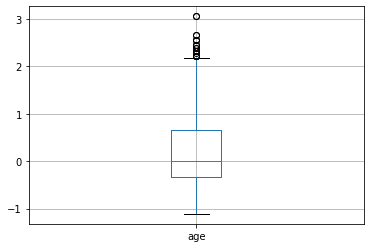

In [75]:
df.boxplot(column=['age'])
plt.show()

I can still see the presence of outliers iun `age`.
I am going to take a look at their histograms after I scale them.

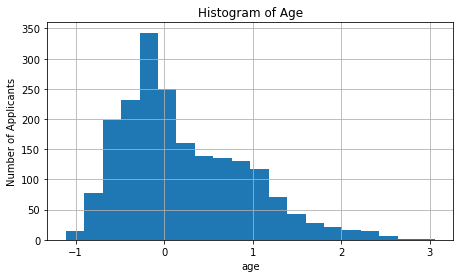

In [76]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot age
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Age")
ax1.set_xlabel('age')
ax1.set_ylabel('Number of Applicants')
df['age'].hist(bins=20)

plt.show()

Both histograms are skewed to the left, which is not ideal. `Many ML algorithms work best when the features are not skewed to either side.` Before treating the outliers, I will find the minimum values in these columns.

In [77]:
df[['age']].min()

age   -1.111111
dtype: float64

Dealing with outliers I can either one of two different transformations:
- Log Transformation: Replaces each variable x with log(x). It helps reduce or removes the skewness of the original data.

- Cubic Root Transformation: Replaces each variable x with x^x(1/3). Also reduces skewness but is weaker than the logarithm. It has an advantage that it can be applied to zero and negative values.

I do have negative values in the columns after rescaling and I need to add a constant to all values in order to shift them to a positive range before applying a log transformation.

Here I  have chosen to shift the values to the interval  [1,+∞]  before applying a log transformation.

In [78]:
# Use a log transformation to decrease the impact of outliers
df['age'] = np.log(df['age']+2.11)

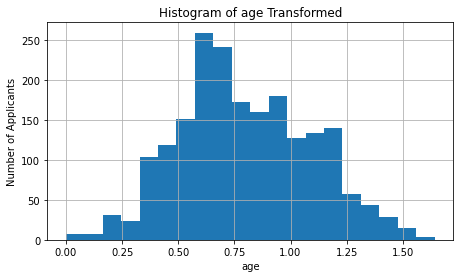

In [79]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of age Transformed")
ax1.set_xlabel('age')
ax1.set_ylabel('Number of Applicants')
df['age'].hist(bins=20)

plt.show()

I can see not that the histogram has more of a normal distrubution rather than than a skewed one in the originakl features of `age`.

In [80]:
df['age'].value_counts()

 0.605530    95
 0.664405    90
 0.542970    87
 0.635400    84
 0.574739    80
             ..
 0.104360     2
 1.399814     2
 1.563743     2
-0.001112     1
 1.478823     1
Name: age, Length: 68, dtype: int64

## F. Creation of Derived Features

`previous` contains many zeros which is interpereted wtih `number of contacts performed before this campaign and for this client`. It can't be filled iin because its zero for a reason. On the other hand, they skew the feature towards 0 and this cannot be easily fixed with a log transformation.

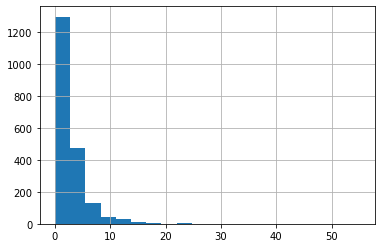

In [84]:
df['previous'].hist(bins=20)
plt.show()

# I don't see anything that needs to be changed for this step.

# G. Save the Prepared Dataset

In [87]:
df.to_csv('./bank_prepared.csv')